extract features from that .py notebook
deicide which model to use
1. price prediction - use ML models like Xg boost - prediction is based on car plate features
2. price modeling over time - use time series models like ARIMA - prediction is based on the price change over time.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./data/train.csv')
data

,id,plate,date,price
0,1,X059CP797,2024-12-26 00:00:00,65000
1,2,Y800MH790,2024-07-12 21:31:37,100000
2,3,A212TX77,2024-04-18 00:00:00,290000
3,4,P001AY199,2025-01-03 00:27:15,680000
4,5,P001AY199,2025-01-10 09:32:41,750000
...,...,...,...,...
51630,51631,X023PP797,2025-01-29 00:00:00,70000
51631,51632,M004KA161,2025-01-31 00:00:00,1600000
51632,51633,E888EB199,2025-02-06 00:00:00,850000
51633,51634,X023XK77,2024-04-24 11:30:07,150000


In [6]:
data.dtypes

id        int64
plate    object
date     object
price     int64
dtype: object

In [7]:
data.describe()

,id,price
count,51635.000000,5.163500e+04
mean,25818.000000,4.532253e+05
std,14905.884912,1.793287e+06
min,1.000000,2.000000e+04
25%,12909.500000,7.000000e+04
50%,25818.000000,1.500000e+05
75%,38726.500000,3.600000e+05
max,51635.000000,1.000000e+08


### Exploratory Data Analysis

In [5]:
#checking if there are any null values
data.isnull().sum()

id       0
plate    0
date     0
price    0
dtype: int64

In [ ]:
#Checking if there are any duplicate values
data.duplicated().sum()

0

In [ ]:
# Number of unique car plate numbers
data['plate'].nunique()

43605

<Axes: >

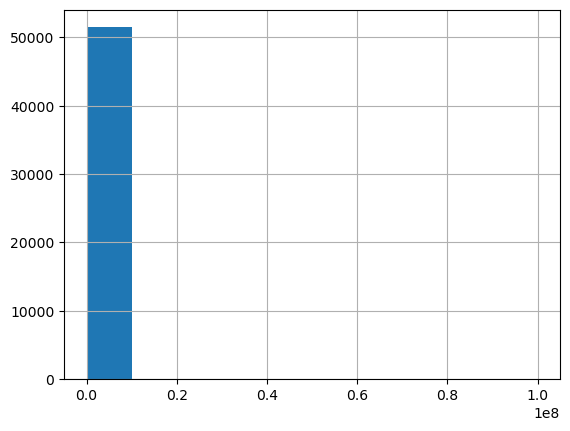

In [19]:
data['price'].hist(bins = 10)

In [ ]:
# why does this data have abnormal prices compared to the other data?
data[data['price'] > 10000000]

,id,plate,date,price
335,336,E007XA77,2023-10-18 00:00:00,50000000
528,529,P888PP99,2025-01-17 00:00:00,15000000
560,561,C666OC66,2024-09-13 00:00:00,15000000
1546,1547,H666AA777,2023-09-23 00:00:00,12000000
1794,1795,K252KK777,2024-10-14 00:00:00,100000000
...,...,...,...,...
51217,51218,M444MM197,2025-02-09 00:00:00,11000000
51223,51224,M010MM77,2024-11-19 15:37:48,35000000
51224,51225,M010MM77,2025-01-12 20:25:16,36000000
51225,51226,M010MM77,2025-02-11 00:00:00,33000000


Text(0.5, 1.0, 'Price Changes Over Time')

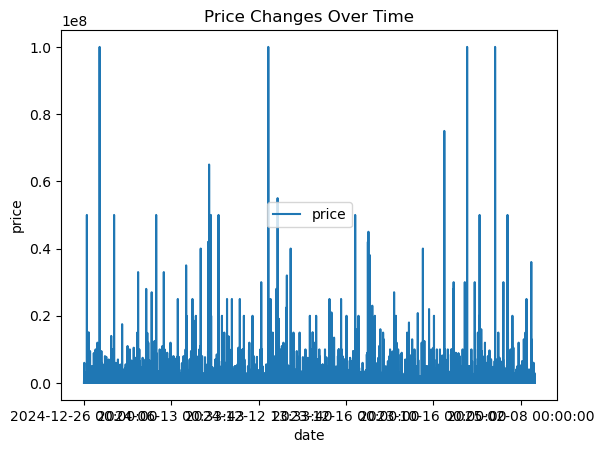

In [21]:
data.plot(x = 'date', y = 'price')
plt.ylabel('price')
plt.title('Price Changes Over Time')

In [24]:
data['date'] = pd.to_datetime(data['date'])
data

,id,plate,date,price
0,1,X059CP797,2024-12-26 00:00:00,65000
1,2,Y800MH790,2024-07-12 21:31:37,100000
2,3,A212TX77,2024-04-18 00:00:00,290000
3,4,P001AY199,2025-01-03 00:27:15,680000
4,5,P001AY199,2025-01-10 09:32:41,750000
...,...,...,...,...
51630,51631,X023PP797,2025-01-29 00:00:00,70000
51631,51632,M004KA161,2025-01-31 00:00:00,1600000
51632,51633,E888EB199,2025-02-06 00:00:00,850000
51633,51634,X023XK77,2024-04-24 11:30:07,150000


In [ ]:
#Range of date values
min(data.date), max(data.date)

(Timestamp('2021-02-17 21:21:56'), Timestamp('2025-02-12 00:00:00'))

In [ ]:
data.groupby('plate')['price'].agg('count')

plate
A001AA197    1
A001AA75     1
A001AA97     1
A001AE123    1
A001AO61     1
            ..
Y999YH97     1
Y999YM150    1
Y999YM90     2
Y999YX777    1
Y999YY90     1
Name: price, Length: 43605, dtype: int64

In [42]:
data.groupby('plate')['price'].transform('count').value_counts

#data['count_per_plate'].value_counts()


<bound method IndexOpsMixin.value_counts of 0        1
1        1
2        1
3        2
4        2
        ..
51630    2
51631    1
51632    1
51633    1
51634    1
Name: price, Length: 51635, dtype: int64>

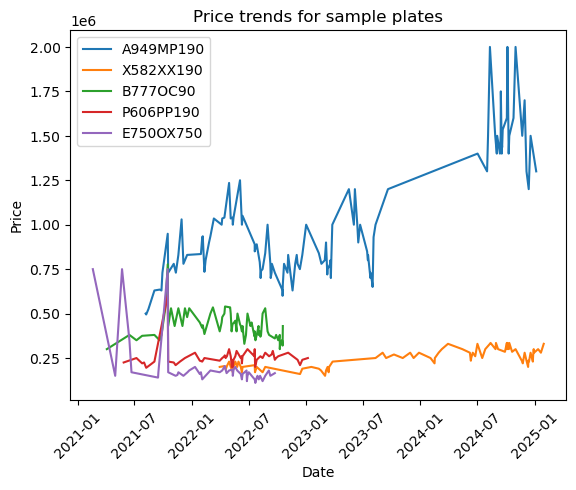

In [41]:
# Visualing price trends for most frequent 5 car plates
sample_plates = data['plate'].value_counts().index[:5]  # Take 5 most frequent plates
for plate in sample_plates:
    subset = data[data['plate'] == plate]
    plt.plot(subset['date'], subset['price'], label=plate)

plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.title("Price trends for sample plates")
plt.xticks(rotation=45)
plt.show()


Based on the above choices I decided to use regression models

### Feature Engineering

In [30]:
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['hour'] = data['date'].dt.hour
data['min'] = data['date'].dt.minute
data['sec'] = data['date'].dt.second
data.head()

,id,plate,date,price,year,month,day,hour,min,sec
0,1,X059CP797,2024-12-26 00:00:00,65000,2024,12,26,0,0,0
1,2,Y800MH790,2024-07-12 21:31:37,100000,2024,7,12,21,31,37
2,3,A212TX77,2024-04-18 00:00:00,290000,2024,4,18,0,0,0
3,4,P001AY199,2025-01-03 00:27:15,680000,2025,1,3,0,27,15
4,5,P001AY199,2025-01-10 09:32:41,750000,2025,1,10,9,32,41
